# Logistic Regression 구현
1) 제가 제시한 틀을 사용하여 구현을 할 필요는 없습니다. 원하시는 대로 구현하시면 됩니다.  
2) 단, code copy는 허용하지 않습니다. 코드 주석을 꼭 상세히 달아주세요. 주석이 부족한 경우, 미제출로 간주합니다.

### None 값을 채워주세요!!!!!

In [1]:
import math, random
from functools import partial,reduce
from assignment2 import *
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
"""
data 설명
1) Label: 유료 계정 등록 여부(target)
2) bias: 회귀 모형에서의 상수항을 위한 term (추정 시 포함하지 않아도 ok)
3) experience: 근속연수
4) salary: 연봉

어떤 사용자가 유료 계정을 등록할지(Label == 1)에 대한 예측을 로지스틱 회귀 모형으로 진행합니다.
"""

'\ndata 설명\n1) Label: 유료 계정 등록 여부(target)\n2) bias: 회귀 모형에서의 상수항을 위한 term (추정 시 포함하지 않아도 ok)\n3) experience: 근속연수\n4) salary: 연봉\n\n어떤 사용자가 유료 계정을 등록할지(Label == 1)에 대한 예측을 로지스틱 회귀 모형으로 진행합니다.\n'

In [3]:
data = pd.read_csv('assignment_2.csv')

In [4]:
data

Label  bias  experience  salary
0        1     1         0.7   48000
1        0     1         1.9   48000
2        1     1         2.5   60000
3        0     1         4.2   63000
4        0     1         6.0   76000
5        0     1         6.5   69000
6        0     1         7.5   76000
7        0     1         8.1   88000
8        1     1         8.7   83000
9        1     1        10.0   83000
10       0     1         0.8   43000
11       0     1         1.8   60000
12       1     1        10.0   79000
13       0     1         6.1   76000
14       0     1         1.4   50000
15       0     1         9.1   92000
16       0     1         5.8   75000
17       0     1         5.2   69000
18       0     1         1.0   56000
19       0     1         6.0   67000
20       0     1         4.9   74000
21       1     1         6.4   63000
22       0     1         6.2   82000
23       0     1         3.3   58000
24       1     1         9.3   90000
25       1     1         5.5   57000
26       0     1         9.1  102000
27       0     1         2.4   54000
28       1     1         8.2   65000
29       0     1         5.3   82000
..     ...   ...         ...     ...
170      0     1         6.2   70000
171      1     1         6.6   56000
172      0     1         6.3   76000
173      0     1         6.5   78000
174      0     1         5.1   59000
175      1     1         9.5   74000
176      0     1         4.5   64000
177      0     1         2.0   54000
178      0     1         1.0   52000
179      0     1         4.0   69000
180      0     1         6.5   76000
181      0     1         3.0   60000
182      0     1         4.5   63000
183      0     1         7.8   70000
184      1     1         3.9   60000
185      0     1         0.8   51000
186      0     1         4.2   78000
187      0     1         1.1   54000
188      0     1         6.2   60000
189      0     1         2.9   59000
190      0     1         2.1   52000
191      0     1         8.2   87000
192      0     1         4.8   73000
193      1     1         2.2   42000
194      0     1         9.1   98000
195      0     1         6.5   84000
196      0     1         6.9   73000
197      0     1         5.1   72000
198      1     1         9.1   69000
199      1     1         9.8   79000

[200 rows x 4 columns]

### 0. Gradient Descent

In [5]:
a = [1,2,3]
b = np.array(a)
type(b)

numpy.ndarray

In [6]:
def step(v, direction, step_size):
    """
    한 지점에서 step size만큼 이동하는 step 함수를 구현하세요.
    v와 direction은 벡터.
    """
    
    #v= np.array(v)
    #direction = np.array(direction)
    
    #a = v - step_size * direction
    
    return [v_i - step_size*direction_i for v_i, direction_i in zip(v,direction)]

In [7]:
def safe(f) :
    """
    f에 대한 예외처리를 위한 함수(f가 infinite일 때)
    """
    def safe_f(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except:
            return float('inf')
    return safe_f

In [8]:
def minimize_bgd(target_fn, gradient_fn, theta_0, tolerance = 0.00001): # bgd: batch gradient descent
    """
    목적함수를 최소화시키는 theta를 경사 하강법을 사용해서 찾는다.
    """
    step_sizes = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
    
    # 시작점 설정
    theta = theta_0
#     target_fn = safe(target_fn) # 오류를 처리할 수 있는 target_fn으로 변환
    value = target_fn(theta) # 최소화시키려는 값
    #value는 y값, theta를 인자로 받아서 
    
    
    while True:
        gradient = gradient_fn(theta) # gradient값 계산
        
        next_thetas = []        
        for i in step_sizes:
            next_thetas.append(step(theta, gradient,i))
          #### update thetas --> 각 step sizes에 따른 theta값을 list형태로 리턴
        
        # 함수를 최소화시키는 theta 선택
        obj = next_thetas ## 알맞은 obj는 x값, key 값을 채워넣으세요.
        key = target_fn
        next_theta = min(obj, key = key)
        next_value = target_fn(next_theta)
        
        # tolerance만큼 수렴하면 멈춤
        temp =  abs(value - next_value) # temp는  채워넣기
        if temp < tolerance:
            #theta = next_theta 있으나 마나한 코드
            return theta
        else:
            theta,value = next_theta, next_value
            pass
        

In [9]:
def stochastic():
    """
    sgd 구현 (추가적인 부분이니 필수는 아닙니다.)
    random sampling 하는 부분(함수로 따로 구현하셔도 ok) + gd 부분
    """

### 1. 로지스틱 함수
해당 함수는 1/(1+exp[-(ax+b)]로 표현되었음을 기억합시다.

In [10]:
def logistic(x):
    try:
        return 1.0 / (1 + math.exp(-x))
    except:
        return 1e-9

In [11]:
def softmax():
    """
    softmax 구현
    """
    #추가문제
    return None

### 2. Likelihood 구현
그냥 Likelihood function 대신, log likelihood function을 이용해서 구현하세요.

In [12]:
def logistic_log_likelihood_i(x_i, y_i, beta): # 개별 데이터포인트에 대한 likelihood 값
    """
    해당 함수에 대한 설명을 작성하고,
    리턴문을 채우세요.
    """
    if y_i == 1:
        return math.log(logistic(dot(x_i, beta)))
    else:
        return math.log(1 - logistic(dot(x_i, beta))+1e-9)

In [13]:
def logistic_log_likelihood(X,Y,beta): # 전체 데이터에 대한 likelihood
    """
    함수의 인자를 채워넣고,
    zip 함수를 이용하여 return 문을 완성하세요.
    """
    new = list(zip(X,Y))
    sum = 0
    for i in new:
        sum += logistic_log_likelihood_i(i[0],i[1],beta)
        
    return sum

### 3. Gradient for Log Reg
아래 3가지 함수에 대해 해당 함수의 인자와 기능을 자세히 설명하세요.

In [14]:
def logistic_log_partial_ij(x_i, y_i, beta, j):
    #print((y_i - logistic(dot(x_i, beta))) * x_i[j])
    return (y_i - logistic(dot(x_i, beta))) * x_i[j]
#x값을 넣었을때 1일 확률
#편미분

def logistic_log_gradient_i(x_i, y_i, beta):
    return [logistic_log_partial_ij(x_i, y_i, beta, j) for j, _ in enumerate(beta)]
#편미분한 값의 리스트

def logistic_log_gradient(x, y, beta):
    return reduce(vector_add, [logistic_log_gradient_i(x_i, y_i, beta) for x_i, y_i in zip(x,y)])

###설명###

### 4. Model Fitting
위에서 구현한 log likelihood를 이용하여 Model을 Fitting 시켜보세요.  
앞서 우리는 log likelihood를 maximize하는 방향으로 회귀계수를 추정한다고 배웠습니다.  
Gradient Descent는 경사 "하강법"으로 최솟값을 찾는 데에 사용되는 알고리즘입니다.  
따라서 log likelihood를 적절히 변형을 해야 Gradient Descent 코드를 적용할 수 있습니다.  
log likelihood 변형 함수는 assignment2.py에 구현되어있으니, None값만 채워주시면 됩니다.

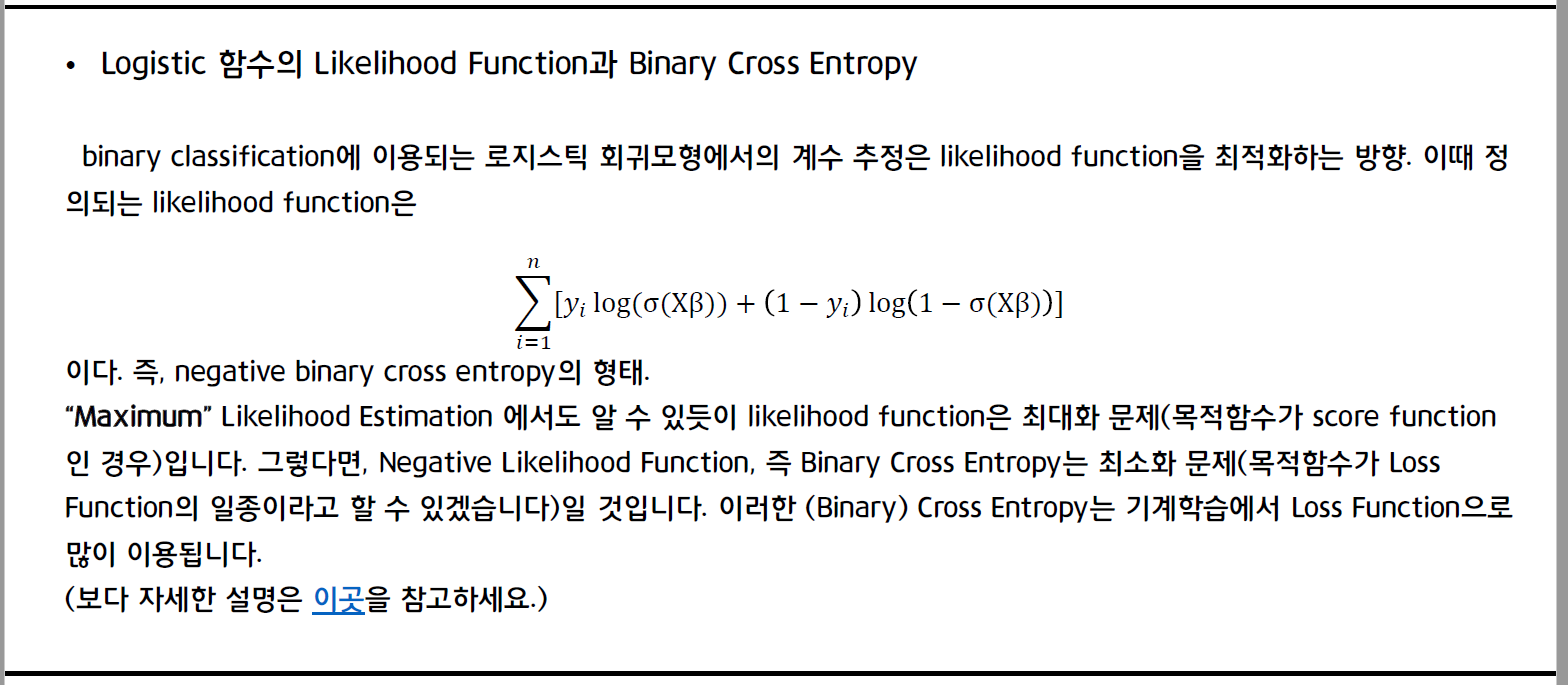  
https://curt-park.github.io/2018-09-19/loss-cross-entropy/

In [15]:
data

Label  bias  experience  salary
0        1     1         0.7   48000
1        0     1         1.9   48000
2        1     1         2.5   60000
3        0     1         4.2   63000
4        0     1         6.0   76000
5        0     1         6.5   69000
6        0     1         7.5   76000
7        0     1         8.1   88000
8        1     1         8.7   83000
9        1     1        10.0   83000
10       0     1         0.8   43000
11       0     1         1.8   60000
12       1     1        10.0   79000
13       0     1         6.1   76000
14       0     1         1.4   50000
15       0     1         9.1   92000
16       0     1         5.8   75000
17       0     1         5.2   69000
18       0     1         1.0   56000
19       0     1         6.0   67000
20       0     1         4.9   74000
21       1     1         6.4   63000
22       0     1         6.2   82000
23       0     1         3.3   58000
24       1     1         9.3   90000
25       1     1         5.5   57000
26       0     1         9.1  102000
27       0     1         2.4   54000
28       1     1         8.2   65000
29       0     1         5.3   82000
..     ...   ...         ...     ...
170      0     1         6.2   70000
171      1     1         6.6   56000
172      0     1         6.3   76000
173      0     1         6.5   78000
174      0     1         5.1   59000
175      1     1         9.5   74000
176      0     1         4.5   64000
177      0     1         2.0   54000
178      0     1         1.0   52000
179      0     1         4.0   69000
180      0     1         6.5   76000
181      0     1         3.0   60000
182      0     1         4.5   63000
183      0     1         7.8   70000
184      1     1         3.9   60000
185      0     1         0.8   51000
186      0     1         4.2   78000
187      0     1         1.1   54000
188      0     1         6.2   60000
189      0     1         2.9   59000
190      0     1         2.1   52000
191      0     1         8.2   87000
192      0     1         4.8   73000
193      1     1         2.2   42000
194      0     1         9.1   98000
195      0     1         6.5   84000
196      0     1         6.9   73000
197      0     1         5.1   72000
198      1     1         9.1   69000
199      1     1         9.8   79000

[200 rows x 4 columns]

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
X = data.drop('Label', axis = 1)
y = data['Label']

In [18]:
X = X.as_matrix()
y = y.as_matrix()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [19]:
scaler = StandardScaler() # Scaling
X = scaler.fit_transform(X)

In [20]:
from sklearn.model_selection import train_test_split
import random

In [21]:
random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [22]:
# 아래에 Model Fitting 진행
from functools import partial # partial을 이용해 fn과 gradient_fn 구현

fn = neg(partial(logistic_log_likelihood,X_train,y_train)) #X,y고정시켜놓고 베타만 바뀌면 되는 함수를 만들어준다log likeli
gradient_fn = neg_all(partial(logistic_log_gradient,X_train,y_train)) #gradient

beta_0 = [random.random() for _ in range(3)] # 임의의 시작점

# 경사 하강법으로 최적화
beta_hat = minimize_bgd(fn, gradient_fn, beta_0, tolerance = 0.00001)

In [23]:
beta_hat

[0.8444218515250481, 3.048532739953658, -2.972316188257746]